## CS6460 data analysis

### 1. Data preparation and summary stats

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import seaborn as sns

%matplotlib inline

In [252]:
#ingest raw mixed numerical and categorical data produced by AMT study
data = pd.read_csv("data_categorical.csv")
#list data types
data.dtypes

Code      object
answer    object
scale      int64
why       object
dtype: object

In [253]:
data.shape

(132, 4)

In [254]:
# drop "why" column since this will be dealt with separately using NLP
data = data.drop(['why'], axis=1)

In [255]:
data

,Code,answer,scale
0,causal,Text,5
1,causal,Charts,5
2,causal,Text,4
3,causal,Text,4
4,causal,Images,4
...,...,...,...
127,example,Text,4
128,example,Text,5
129,example,Text,5
130,example,Text,3


### Display data

In [256]:
#create pivot table using response numbers in data and sum values
df = data.pivot_table(values='scale', index=['Code', 'answer'], columns=['Code'], aggfunc=len, fill_value=0)
df

Code                causal  contrastive  example
Code        answer                              
causal      Charts      13            0        0
            Images      11            0        0
            Text        16            0        0
contrastive Charts       0            7        0
            Images       0           14        0
            Text         0           30        0
example     Charts       0            0        9
            Images       0            0       11
            Text         0            0       21

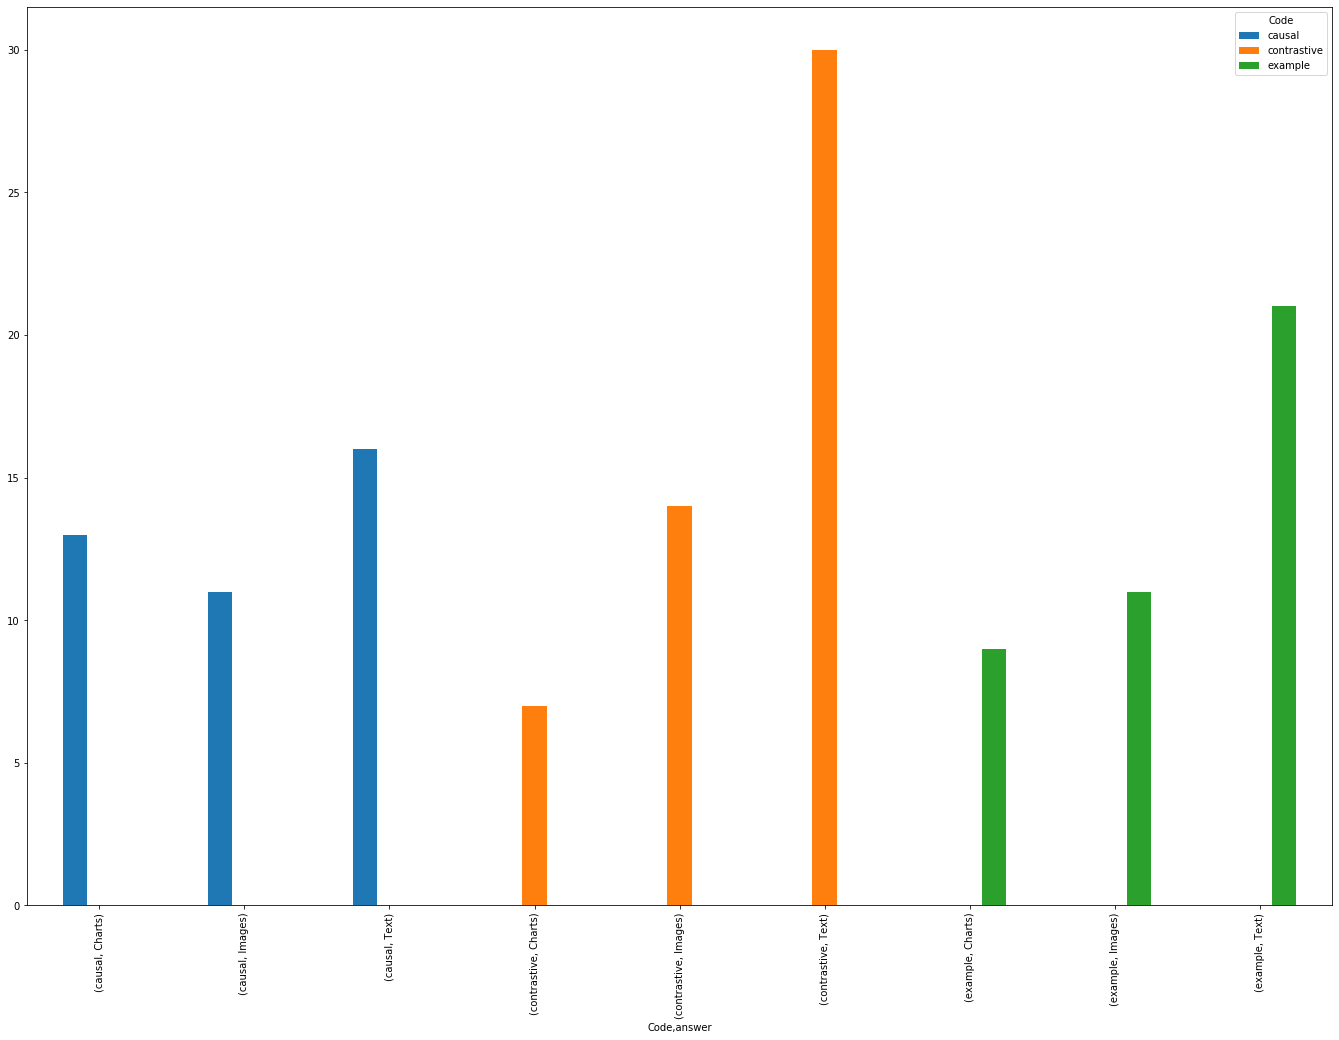

In [257]:
df.plot(kind = 'bar', figsize=(23.39, 16.53))

### 4. Chi Square

In [300]:
#stats.chi2_contingency((df)[0:3], ddof=[0,1,2])

In [280]:
causal_chi = chisquare(df['causal'], ddof=[0,1,2])
contrastive_chi = chisquare(df['contrastive'], ddof=[0,1,2])
example_chi = chisquare(df['example'], ddof=[0,1,2])
print (causal_chi, contrastive_chi, example_chi)

Power_divergenceResult(statistic=82.85, pvalue=array([1.30256683e-14, 3.60815509e-15, 9.20038534e-16])) Power_divergenceResult(statistic=151.05882352941174, pvalue=array([1.17910224e-28, 2.43291869e-29, 4.62055507e-30])) Power_divergenceResult(statistic=100.14634146341461, pvalue=array([3.98502618e-18, 1.00627847e-18, 2.33894693e-19]))


In [293]:
#image_chi = chisquare(df['Images'], ddof=[0,1,2])
#chart_chi = chisquare(df['Charts'], ddof=[0,1,2])
text_chi = chisquare(df['Text'], ddof=[0,1,2])
text_chi

KeyError: 'Text'

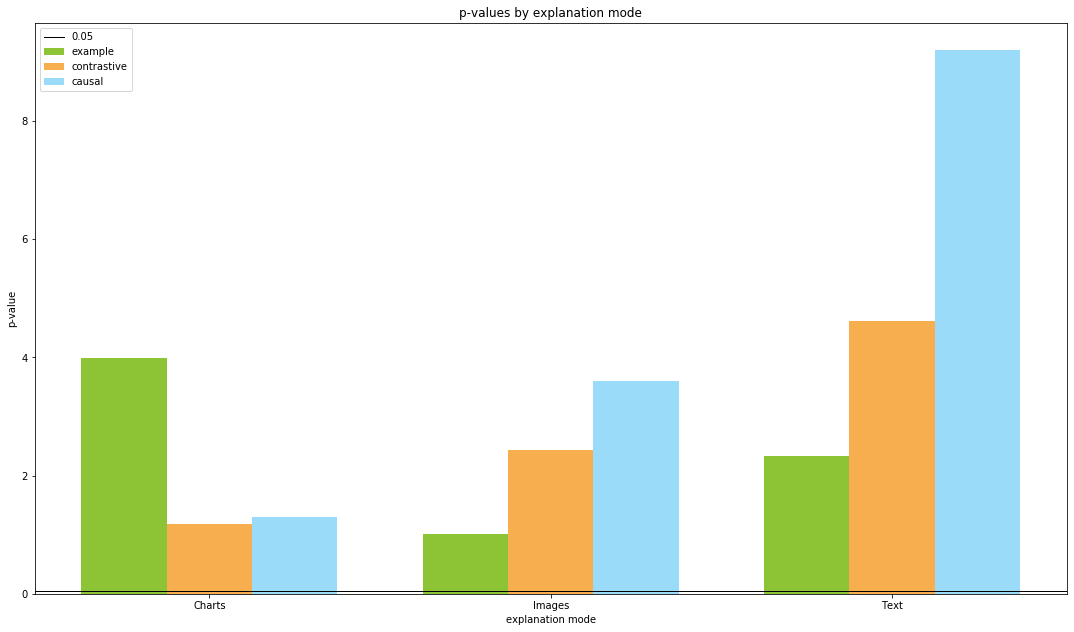

In [285]:

# data to plot
n_groups = 3
example_chi = (3.98502618, 1.00627847, 2.33894693)
contrastive_chi = (1.17910224, 2.43291869, 4.62055507)
causal_chi = (1.30256683, 3.60815509, 9.20038534)


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, example_chi, bar_width,
alpha=opacity,
color='#70B603',
label='example')

rects2 = plt.bar(index + bar_width, contrastive_chi, bar_width,
alpha=opacity,
color='#F59A23',
label='contrastive')

rects3 = plt.bar(index + bar_width + bar_width, causal_chi, bar_width,
alpha=opacity,
color='#81D3F8',
label='causal')

plt.axhline(y=0.05, color='k', linestyle='-', label='0.05', linewidth=1)

plt.xlabel('explanation mode')
plt.ylabel('p-value')
plt.title('p-values by explanation mode')
plt.xticks(index + bar_width, ('Charts', 'Images', 'Text', 'D'))
plt.legend()

fig.set_size_inches(18.5, 10.5)
plt.show()

In [294]:
# convert to categorical using one hot encoding
#data = pd.get_dummies(data, columns=["Code", "answer"]).head()
data = pd.get_dummies(data, dummy_na=True)
data

,scale,Code_causal,Code_contrastive,Code_example,Code_nan,answer_Charts,answer_Images,answer_Text,answer_nan
0,5,1,0,0,0,0,0,1,0
1,5,1,0,0,0,1,0,0,0
2,4,1,0,0,0,0,0,1,0
3,4,1,0,0,0,0,0,1,0
4,4,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
127,4,0,0,1,0,0,0,1,0
128,5,0,0,1,0,0,0,1,0
129,5,0,0,1,0,0,0,1,0
130,3,0,0,1,0,0,0,1,0


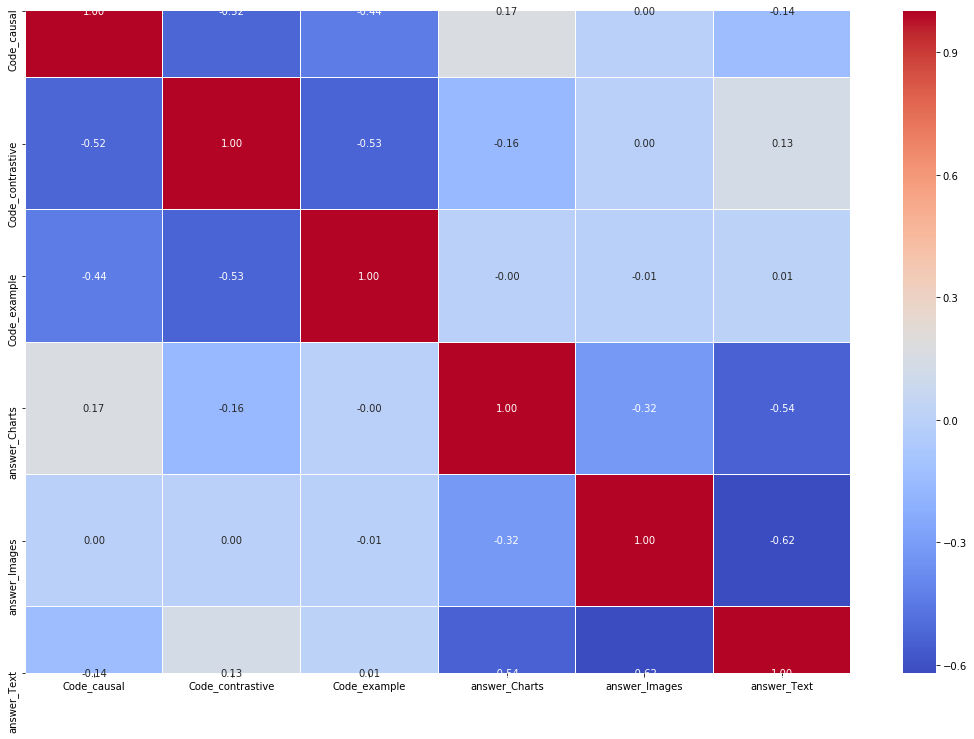

In [306]:
# Correlation Matrix Heatmap
data_dropped = data.drop(['Code_nan', 'scale', 'answer_nan'], axis=1)
f, ax = plt.subplots(figsize=(18.5, 10.5))
corr = data_dropped.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=1)